In [1]:
import spatialdata as sd
from spatialdata.transformations import set_transformation, Affine
from spatialdata.models import ShapesModel
from spatialdata.transformations import (
    align_elements_using_landmarks,
    get_transformation_between_landmarks,
)
from spatialdata import SpatialData
from spatialdata.transformations import (
    BaseTransformation,
    Sequence,
    get_transformation,
    set_transformation,
    Translation
)

import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import xarray as xr

import sys
import os
sys.path.append(os.path.abspath('/media/Lynn/src'))
import load_sdata, align_sdata

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [ ]:
import napari
from napari_spatialdata import Interactive

## Load the data

In [2]:
# Load each CODEX dataset into a SpatialData object
sdata_codex_updated_s1 = load_sdata.get_codex_updated_columns_data('0022110')
sdata_codex_updated_s2 = load_sdata.get_codex_updated_columns_data('0022111')

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring key

In [3]:
# Load each Xenium dataset into a SpatialData object
sdata_xenium_first_slide = load_sdata.get_xenium_slide_data('0022110')
sdata_xenium_second_slide = load_sdata.get_xenium_slide_data('0022111')

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring key

In [4]:
identity_matrix = np.eye(3)  # 3x3 identity transformation

# Define Affine transformation correctly with input/output axes
identity_affine = Affine(
    identity_matrix, 
    input_axes=("x", "y"),  # Assuming 2D spatial data
    output_axes=("x", "y")  
)

set_transformation(
    sdata_codex_updated_s1['column_3']["ID_0022110_Scan1.er.qptiff_column_3.ome.ome"], 
    transformation=identity_affine, 
    to_coordinate_system="global"
)

In [5]:
sdata_codex_updated_s1['column_3']

SpatialData object, with associated Zarr store: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_3.zarr
└── Images
      └── 'ID_0022110_Scan1.er.qptiff_column_3.ome.ome': DataTree[cyx] (27, 40622, 5906), (27, 20311, 2953), (27, 10155, 1476), (27, 5077, 738), (27, 2538, 369)
with coordinate systems:
    ▸ 'global', with elements:
        ID_0022110_Scan1.er.qptiff_column_3.ome.ome (Images)
    ▸ 'pixels', with elements:
        ID_0022110_Scan1.er.qptiff_column_3.ome.ome (Images)

## Open Napari

In [17]:
viewer = Interactive(sdata_xenium_first_slide['column_3'])
viewer.run()

2025-03-26 16:26:29.054 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-26 16:26:29.055 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-26 16:26:56.173 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-26 16:26:56.173 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.


In [16]:
viewer = Interactive(sdata_codex_updated_s1['column_3'])
viewer.run()

2025-03-26 16:22:07.964 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-26 16:22:07.966 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-26 16:23:58.009 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-26 16:23:58.009 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.


## Manually add the landmark points coordinates

In [5]:
xenium_landmarks_s1_c3 = ShapesModel.parse(
    np.array([[54421, 3870], [54903, 3899], [54545, 3451]]), geometry=0, radius=500
)

codex_landmarks_s1_c3 = ShapesModel.parse(
    np.array([[17693, 3863], [17490, 3854], [17640, 4045]]), geometry=0, radius=500
)

## Align images using landmarks

In [ ]:
align_sdata.align_images_using_napari_landmarks(sdata_codex_updated_s1['column_3'], 
    sdata_xenium_first_slide['column_3'], 
    codex_landmarks_s1_c3, 
    xenium_landmarks_s1_c3, 
    'aligned')

### Visualize alignment in Napari

In [27]:
viewer = Interactive(sdata_xenium_first_slide['column_3'])
viewer.run()

2025-03-27 11:31:30.837 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:31:30.839 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:23.760 | INFO     | napari_spatialdata._viewer:get_sdata_points:710 - Subsampling points because the number of points exceeds the currently supported 100000. You can change this threshold with ```from napari_spatialdata.constants import config
config.POINT_THRESHOLD = <new_threshold>```
2025-03-27 11:32:24.256 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:24.270 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:51.363 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:51.370 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:33:39.544 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Upda

In [28]:
viewer = Interactive(sdata_codex_updated_s1['column_3'])
viewer.run()

2025-03-27 11:34:02.373 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:34:02.386 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:34:02.388 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.


## Try a second manual alignment

### Visualize coordinates in Python

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2234678969627066].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2234678969627066].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0249903883121878].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0249903883121878].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0249903883121878].


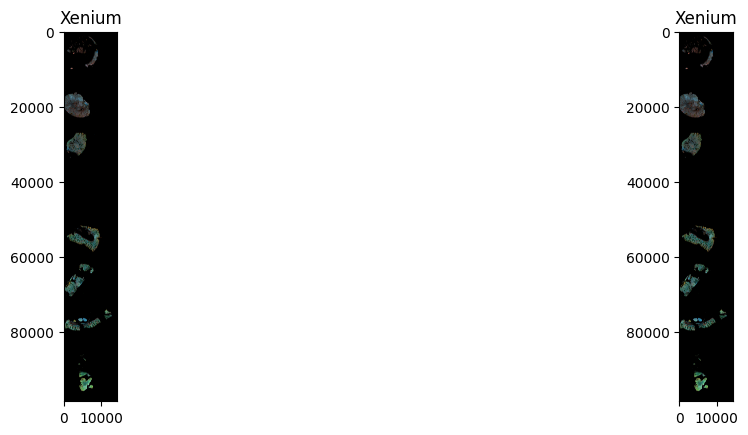

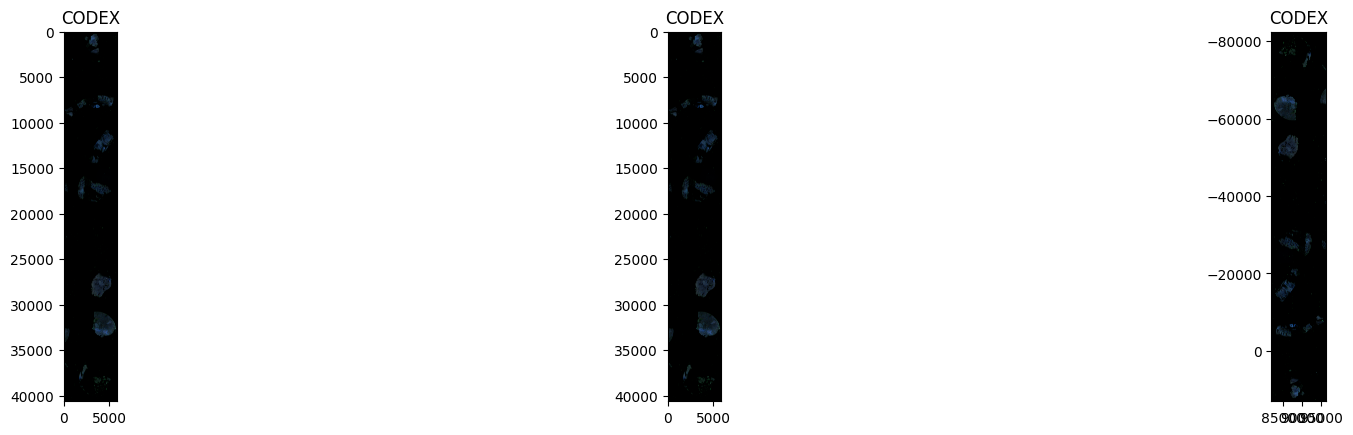

In [13]:
sdata_xenium_first_slide['column_3'].pl.render_images("morphology_focus").pl.show(title="Xenium")
sdata_codex_updated_s1['column_3'].pl.render_images("ID_0022110_Scan1.er.qptiff_column_3.ome.ome").pl.show(title="CODEX")

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0249903883121878].


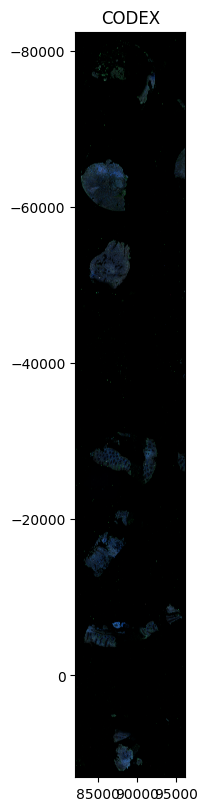

In [54]:
sdata_codex_updated_s1['column_3'].pl.render_images("ID_0022110_Scan1.er.qptiff_column_3.ome.ome").pl.show(
    coordinate_systems='aligned', 
    title="CODEX",
    figsize=(15, 8),
)

### Shift the CODEX image

In [22]:
sdata_codex_updated_s1['column_3'].images["ID_0022110_Scan1.er.qptiff_column_3.ome.ome"]['scale0'].coords['x']

<xarray.DataArray 'x' (x: 5906)> Size: 47kB
array([5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 5.9035e+03, 5.9045e+03,
       5.9055e+03])
Coordinates:
  * x        (x) float64 47kB 0.5 1.5 2.5 3.5 ... 5.904e+03 5.904e+03 5.906e+03

In [42]:
x_codex = sdata_codex_updated_s1['column_3'].images["ID_0022110_Scan1.er.qptiff_column_3.ome.ome"]['scale0'].coords['x']
y_codex = sdata_codex_updated_s1['column_3'].images["ID_0022110_Scan1.er.qptiff_column_3.ome.ome"]['scale0'].coords['y']

In [28]:
print('CODEX:')
print("Shape of x:", x_codex.shape)
print("Shape of y:", y_codex.shape)

CODEX:
Shape of x: (5906,)
Shape of y: (40622,)


In [39]:
sdata_xenium_first_slide['column_3'].images['morphology_focus']

<xarray.DataTree>
Group: /
├── Group: /scale0
│       Dimensions:  (c: 5, y: 98503, x: 14304)
│       Coordinates:
│         * c        (c) <U22 440B 'DAPI' 'ATP1A1/CD45/E-Cadherin' ... 'dummy'
│         * y        (y) float64 788kB 0.5 1.5 2.5 3.5 ... 9.85e+04 9.85e+04 9.85e+04
│         * x        (x) float64 114kB 0.5 1.5 2.5 3.5 ... 1.43e+04 1.43e+04 1.43e+04
│       Data variables:
│           image    (c, y, x) uint16 14GB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale1
│       Dimensions:  (c: 5, y: 49251, x: 7152)
│       Coordinates:
│         * c        (c) <U22 440B 'DAPI' 'ATP1A1/CD45/E-Cadherin' ... 'dummy'
│         * y        (y) float64 394kB 1.0 3.0 5.0 7.0 ... 9.85e+04 9.85e+04 9.85e+04
│         * x        (x) float64 57kB 1.0 3.0 5.0 7.0 ... 1.43e+04 1.43e+04 1.43e+04
│       Data variables:
│           image    (c, y, x) uint16 4GB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale2
│       Dimensions:  (c: 5, y: 24625, x: 3576)
│       Coordinates:
│         * c        (c) <U22 440B 'DAPI' 'ATP1A1/CD45/E-Cadherin' ... 'dummy'
│         * y        (y) float64 197kB 2.0 6.0 10.0 14.0 ... 9.849e+04 9.85e+04 9.85e+04
│         * x        (x) float64 29kB 2.0 6.0 10.0 14.0 ... 1.429e+04 1.43e+04 1.43e+04
│       Data variables:
│           image    (c, y, x) uint16 881MB dask.array<chunksize=(1, 4096, 3576), meta=np.ndarray>
├── Group: /scale3
│       Dimensions:  (c: 5, y: 12312, x: 1788)
│       Coordinates:
│         * c        (c) <U22 440B 'DAPI' 'ATP1A1/CD45/E-Cadherin' ... 'dummy'
│         * y        (y) float64 98kB 4.0 12.0 20.0 ... 9.848e+04 9.849e+04 9.85e+04
│         * x        (x) float64 14kB 4.0 12.0 20.0 ... 1.428e+04 1.429e+04 1.43e+04
│       Data variables:
│           image    (c, y, x) uint16 220MB dask.array<chunksize=(1, 4096, 1788), meta=np.ndarray>
└── Group: /scale4
        Dimensions:  (c: 5, y: 6156, x: 894)
        Coordinates:
          * c        (c) <U22 440B 'DAPI' 'ATP1A1/CD45/E-Cadherin' ... 'dummy'
          * y        (y) float64 49kB 8.001 24.0 40.0 ... 9.846e+04 9.848e+04 9.849e+04
          * x        (x) float64 7kB 8.0 24.0 40.0 56.0 ... 1.426e+04 1.428e+04 1.43e+04
        Data variables:
            image    (c, y, x) uint16 55MB dask.array<chunksize=(1, 4096, 894), meta=np.ndarray>

In [32]:
x_xenium = sdata_xenium_first_slide['column_3'].images["morphology_focus"]['scale0'].coords['x']
y_xenium = sdata_xenium_first_slide['column_3'].images["morphology_focus"]['scale0'].coords['y']

In [33]:
print('Xenium:')
print("Shape of x:", x_xenium.shape)
print("Shape of y:", y_xenium.shape)

Xenium:
Shape of x: (14304,)
Shape of y: (98503,)


In [45]:
import numpy as np

# Example: Your affine transformation matrix (modify with your values)
affine_matrix = np.array([
    [-2.35092215e+00,  5.37429150e-03,  9.59961827e+04],
    [-5.37429150e-03, -2.35092215e+00,  1.30518108e+04],
    [0., 0., 1.,]
])

x_max_codex = np.array([5906])
y_max_codex = np.array([40622])

# Convert to homogeneous coordinates
ones = np.ones_like(x_max_codex)
points = np.vstack([x_max_codex, y_max_codex, ones])  # Shape: (3, N)

# Apply transformation
transformed_points = affine_matrix @ points  # Matrix multiplication

# Extract new coordinates
x_transformed, y_transformed = transformed_points[0], transformed_points[1]

# Print or save the transformed coordinates
print("Transformed X:", x_transformed)
print("Transformed Y:", y_transformed)


Transformed X: [82329.95095141]
Transformed Y: [-82479.0893429]


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0249903883121878].


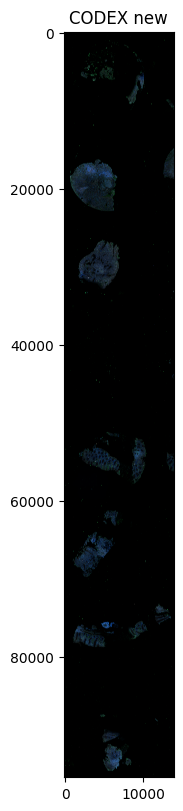

In [46]:
translation = Translation([-82329.95095141, 82329.95095141], axes=("x", "y"))
sequence = Sequence([affine, translation])

set_transformation(sdata_codex_updated_s1['column_3'].images["ID_0022110_Scan1.er.qptiff_column_3.ome.ome"], sequence, to_coordinate_system="new_aligned")

sdata_codex_updated_s1['column_3'].pl.render_images("ID_0022110_Scan1.er.qptiff_column_3.ome.ome").pl.show(
    coordinate_systems='new_aligned', 
    title="CODEX new",
    figsize=(15, 8),
)

### Align all other elements

In [47]:
align_sdata.postpone_codex_transformation(
    sdata=sdata_codex_updated_s1['column_3'],
    transformation=sequence,
    source_coordinate_system="global",
    target_coordinate_system="new_aligned",
)

In [48]:
sdata_codex_updated_s1['column_3']

SpatialData object, with associated Zarr store: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_3.zarr
├── Images
│     └── 'ID_0022110_Scan1.er.qptiff_column_3.ome.ome': DataTree[cyx] (27, 40622, 5906), (27, 20311, 2953), (27, 10155, 1476), (27, 5077, 738), (27, 2538, 369)
└── Shapes
      └── 'codex_landmarks': GeoDataFrame shape: (3, 2) (2D shapes)
with coordinate systems:
    ▸ 'aligned', with elements:
        ID_0022110_Scan1.er.qptiff_column_3.ome.ome (Images), codex_landmarks (Shapes)
    ▸ 'global', with elements:
        ID_0022110_Scan1.er.qptiff_column_3.ome.ome (Images), codex_landmarks (Shapes)
    ▸ 'new_aligned', with elements:
        ID_0022110_Scan1.er.qptiff_column_3.ome.ome (Images), codex_landmarks (Shapes)
    ▸ 'pixels', with elements:
        ID_0022110_Scan1.er.qptiff_column_3.ome.ome (Images)
with the following elements not in the Zarr store:
    ▸ codex_landmarks (Shapes)

### Visualize new alignment in Napari

In [27]:
viewer = Interactive(sdata_xenium_first_slide['column_3'])
viewer.run()

2025-03-27 11:31:30.837 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:31:30.839 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:23.760 | INFO     | napari_spatialdata._viewer:get_sdata_points:710 - Subsampling points because the number of points exceeds the currently supported 100000. You can change this threshold with ```from napari_spatialdata.constants import config
config.POINT_THRESHOLD = <new_threshold>```
2025-03-27 11:32:24.256 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:24.270 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:51.363 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:32:51.370 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:33:39.544 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Upda

In [28]:
viewer = Interactive(sdata_codex_updated_s1['column_3'])
viewer.run()

2025-03-27 11:34:02.373 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:34:02.386 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.
2025-03-27 11:34:02.388 | DEBUG    | napari_spatialdata._view:_on_layer_update:569 - Updating layer.


In [ ]:
s1_c3_alignment_path = Path('N:/moor/Lynn/alignment/ID_0022110_col3_iF_alignment_files/matrix.csv')

In [ ]:
align_sdata.align_images_using_alignment_matrix(
    sdata_codex_first_slide, 
    sdata_xenium_first_slide['column_3'], 
    s1_c3_alignment_path,
    'aligned'
)